In [1]:
#importing libraries

import pandas as pd
import numpy as np
import pytest
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing data present in the csv file

survey_results_df = pd.read_csv('survey_results_public.csv')

In [3]:
survey_results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              88883 non-null  int64  
 1   MainBranch              88331 non-null  object 
 2   Hobbyist                88883 non-null  object 
 3   OpenSourcer             88883 non-null  object 
 4   OpenSource              86842 non-null  object 
 5   Employment              87181 non-null  object 
 6   Country                 88751 non-null  object 
 7   Student                 87014 non-null  object 
 8   EdLevel                 86390 non-null  object 
 9   UndergradMajor          75614 non-null  object 
 10  EduOther                84260 non-null  object 
 11  OrgSize                 71791 non-null  object 
 12  DevType                 81335 non-null  object 
 13  YearsCode               87938 non-null  object 
 14  Age1stCode              87634 non-null

### A. The average age of developers when they wrote their first line of code.

In the column 'Age1stCode', we want the values in numeric, bur the values are of the type 'object'.
Checking unique values:

In [4]:
survey_results_df.Age1stCode.unique()

array(['10', '17', '22', '16', '14', '15', '11', '20', '13', '18', '12',
       '19', '21', '8', '35', '6', '9', '29', '7', '5', '23', '30', nan,
       '27', '24', 'Younger than 5 years', '33', '25', '26', '39', '36',
       '38', '28', '31', 'Older than 85', '32', '37', '50', '65', '42',
       '34', '40', '67', '43', '44', '60', '46', '45', '49', '51', '41',
       '55', '83', '48', '53', '54', '47', '56', '79', '61', '68', '77',
       '66', '52', '80', '62', '84', '57', '58', '63'], dtype=object)

We see that the values are of string type. Replacing 'Younger than 5 years' to '5' and 'Older than 85' to '85' and then change the data type of the whole column:

In [5]:
# replacing and changing the data type of column 'Age1stCode':

def age1stcode_tranformation():
    survey_results_df['Age1stCode'] = survey_results_df['Age1stCode'].replace('Younger than 5 years','5')
    survey_results_df['Age1stCode'] = survey_results_df['Age1stCode'].replace('Older than 85','85')
    survey_results_df['Age1stCode'] = survey_results_df['Age1stCode'].apply(pd.to_numeric)
    AGE_ARRAY = survey_results_df.Age1stCode.unique()
    return AGE_ARRAY

In [6]:
#unit test for age transformation:

TEST_AGE_ARRAY = np.array([10, 17, 22, 16, 14, 15, 11, 20, 13, 18, 12,
       19, 21, 8, 35, 6 ,9, 29, 7, 5, 23, 30, np.nan,
       27, 24, 33, 25, 26, 39, 36,
       38, 28, 31, 85, 32, 37, 50, 65, 42,
       34, 40, 67, 43, 44, 60, 46, 45, 49, 51, 41,
       55, 83, 48, 53, 54, 47, 56, 79, 61, 68, 77,
       66, 52, 80, 62, 84, 57, 58, 63])

np.testing.assert_array_equal(TEST_AGE_ARRAY,age1stcode_tranformation())

In [7]:
# the average age of developers when they wrote their first line of code.

AVG_AGE_1ST_CODE = survey_results_df['Age1stCode'].mean()
print('The average age of developers when they wrote their first line of code is: "', round(AVG_AGE_1ST_CODE,2),'" years.')

The average age of developers when they wrote their first line of code is: " 15.42 " years.


### B. The percentage of developers who know python in each country.

Creating a dataframe that will show percentage of developers knwing python in each country.

In [32]:
import re
COUNTRIES_ARRAY = np.delete(survey_results_df.Country.unique(),-1)
counts_list = []
total_lang_counts_list = []
nation_list = []
country_wise_python_percent_list = []
for country in COUNTRIES_ARRAY:
    count=0
    
    nation_list.append(country)
    lang_country_df = survey_results_df[(survey_results_df['Country']==country) & (survey_results_df['LanguageWorkedWith'].notnull())].reset_index().drop('index',axis=1)
    
    any_language_count = lang_country_df.shape[0]
    total_lang_counts_list.append(any_language_count)
    
    for i in range(len(lang_country_df)):
        if re.search('Python',lang_country_df.LanguageWorkedWith[i]):
            count = count+1
        
    counts_list.append(count)
    
    if any_language_count > 0:
        python_percent_of_total = round((count/any_language_count)*100,2)
        country_wise_python_percent_list.append(python_percent_of_total)
    else:
        country_wise_python_percent_list.append(np.nan) # for zero division error

percent_python_dev_dict = {'Country':nation_list,'Percentage_of_developers_knowing_python':country_wise_python_percent_list}
percent_python_dev_df = pd.DataFrame(percent_python_dev_dict).sort_values(by=['Country']).reset_index().drop('index',axis=1)

In [33]:
pd.set_option('display.max_rows', 180)
percent_python_dev_df

,Country,Percentage_of_developers_knowing_python
0,Afghanistan,20.51
1,Albania,27.71
2,Algeria,31.75
3,Andorra,0.00
4,Angola,50.00
5,Antigua and Barbuda,0.00
6,Argentina,34.92
7,Armenia,33.33
8,Australia,42.02
9,Austria,40.62


### C. The average salary of developer based on continent.

Since continent data is not available in the survey_results_public.csv, we need to import another data set containing name of the countries and their continents, and then merge the two tables :

In [8]:
country_df = pd.read_html('https://github.com/dbouquin/IS_608/blob/master/NanosatDB_munging/Countries-Continents.csv')[0].drop('Unnamed: 0',axis=1)

In [17]:
survey_results_df = survey_results_df.merge(country_df, how='left', on = 'Country')

In [19]:
survey_results_df.Continent.unique()

array(['Europe', 'Asia', nan, 'North America', 'Oceania', 'South America',
       'Africa'], dtype=object)

In [28]:
survey_results_df[survey_results_df['Continent'].isnull()].Country.unique()

array(['United States', 'Czech Republic', 'South Korea', 'Viet Nam',
       'Hong Kong (S.A.R.)', 'Republic of Moldova', 'Taiwan',
       'Libyan Arab Jamahiriya', 'Venezuela, Bolivarian Republic of...',
       "Côte d'Ivoire", 'Syrian Arab Republic', 'Brunei Darussalam',
       'Other Country (Not Listed Above)',
       'The former Yugoslav Republic of Macedonia', 'Myanmar',
       'Democratic Republic of the Congo', 'United Republic of Tanzania',
       "Lao People's Democratic Republic", 'Republic of Korea',
       'North Korea', 'Congo, Republic of the...', 'Timor-Leste',
       "Democratic People's Republic of Korea", 'Burkina Faso', nan],
      dtype=object)

Above we see the list of countires that do not have corresponding continent names even after merging. This is because of same countries are sometimes referred slightly different. Adding respective continent names for the countries in the above list :

In [30]:
survey_results_df['Continent'] = np.where((survey_results_df['Country'] == 'United States'),'North America',survey_results_df['Continent'])
survey_results_df['Continent'] = np.where((survey_results_df['Country'] == 'Czech Republic'),'Europe',survey_results_df['Continent'])
survey_results_df['Continent'] = np.where((survey_results_df['Country'] == 'South Korea'),'Asia',survey_results_df['Continent'])
survey_results_df['Continent'] = np.where((survey_results_df['Country'] == 'Viet Nam'),'Asia',survey_results_df['Continent'])
survey_results_df['Continent'] = np.where((survey_results_df['Country'] == 'Hong Kong (S.A.R.)'),'Asia',survey_results_df['Continent'])
survey_results_df['Continent'] = np.where((survey_results_df['Country'] == 'Republic of Moldova'),'Europe',survey_results_df['Continent'])
survey_results_df['Continent'] = np.where((survey_results_df['Country'] == 'Taiwan'),'Asia',survey_results_df['Continent'])
survey_results_df['Continent'] = np.where((survey_results_df['Country'] == 'Libyan Arab Jamahiriya'),'Africa',survey_results_df['Continent'])
survey_results_df['Continent'] = np.where((survey_results_df['Country'] == 'Venezuela, Bolivarian Republic of...'),'South America',survey_results_df['Continent'])
survey_results_df['Continent'] = np.where((survey_results_df['Country'] == 'Côte d\'Ivoire'),'Africa',survey_results_df['Continent'])
survey_results_df['Continent'] = np.where((survey_results_df['Country'] == 'Syrian Arab Republic'),'Africa',survey_results_df['Continent'])
survey_results_df['Continent'] = np.where((survey_results_df['Country'] == 'Brunei Darussalam'),'Asia',survey_results_df['Continent'])
survey_results_df['Continent'] = np.where((survey_results_df['Country'] == 'The former Yugoslav Republic of Macedonia'),'Europe',survey_results_df['Continent'])
survey_results_df['Continent'] = np.where((survey_results_df['Country'] == 'Myanmar'),'Asia',survey_results_df['Continent'])
survey_results_df['Continent'] = np.where((survey_results_df['Country'] == 'Democratic Republic of the Congo'),'Africa',survey_results_df['Continent'])
survey_results_df['Continent'] = np.where((survey_results_df['Country'] == 'United Republic of Tanzania'),'Africa',survey_results_df['Continent'])
survey_results_df['Continent'] = np.where((survey_results_df['Country'] == 'Lao People\'s Democratic Republic'),'Asia',survey_results_df['Continent'])
survey_results_df['Continent'] = np.where((survey_results_df['Country'] == 'Republic of Korea'),'Asia',survey_results_df['Continent'])
survey_results_df['Continent'] = np.where((survey_results_df['Country'] == 'North Korea'),'Asia',survey_results_df['Continent'])
survey_results_df['Continent'] = np.where((survey_results_df['Country'] == 'Congo, Republic of the...'),'Africa',survey_results_df['Continent'])
survey_results_df['Continent'] = np.where((survey_results_df['Country'] == 'Timor-Leste'),'Asia',survey_results_df['Continent'])
survey_results_df['Continent'] = np.where((survey_results_df['Country'] == 'Democratic People\'s Republic of Korea'),'Asia',survey_results_df['Continent'])
survey_results_df['Continent'] = np.where((survey_results_df['Country'] == 'Burkina Faso'),'Africa',survey_results_df['Continent'])

In [31]:
survey_results_df[survey_results_df['Continent'].isnull()].Country.unique()

array(['Other Country (Not Listed Above)', nan], dtype=object)

In [37]:
#calculating average salary for each country using group by:

salary_country_df = survey_results_df[survey_results_df['ConvertedComp'].notnull()]
avg_salary_country_df = salary_country_df.groupby(['Continent'])[['ConvertedComp']].mean().round().reset_index().rename(columns={'ConvertedComp':'Average_annual_salary_USD'})
avg_salary_country_df

,Continent,Average_annual_salary_USD
0,Africa,34847.0
1,Asia,37056.0
2,Europe,99826.0
3,North America,225667.0
4,Oceania,166951.0
5,South America,32692.0


### D. Based on this survey, what will be the most desired programming language for the year 2020?

In [38]:
survey_results_df.LanguageDesireNextYear.unique()

array(['C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL',
       'C++;HTML/CSS;JavaScript;SQL', 'Elixir;HTML/CSS', ...,
       'Bash/Shell/PowerShell;C;Go;HTML/CSS;JavaScript;WebAssembly',
       'C++;HTML/CSS;JavaScript;SQL;WebAssembly;Other(s):',
       'C;C++;C#;HTML/CSS;Java;Objective-C;SQL;Swift'], dtype=object)

In the unique value array of 'LanguageDesireNextYear' column, there are many unique values with common words in them seperated by ' ; '. Since the count of every unique programming language is required, every entry of the array needs to be split by ' ; '. Every splitted value will be stored in a list and then counted further for every unique programming language.

In [39]:
# LanguageDesireNextYear

desired_lang_df = survey_results_df[survey_results_df['LanguageDesireNextYear'].notnull()].reset_index().drop('index',axis=1)
desired_lang_list = []
desired_lang_dict = {}

for j in range(len(desired_lang_df)):
    lang_split = desired_lang_df.LanguageDesireNextYear[j].split(';')  #splitting by ';'
    
    for lang in lang_split:
        desired_lang_list.append(lang)  #stroring splitted values from lang_split
    
for desired_lang in desired_lang_list:
        desired_lang_dict[desired_lang] = desired_lang_dict.get(desired_lang,0) + 1   #counting using dictionary.get() method.

desired_lang_df = pd.DataFrame(list(desired_lang_dict.items()),columns=['Programming_Language','Desire_count_2020']).sort_values(by='Desire_count_2020',ascending=False).reset_index().drop('index',axis=1)

In [40]:
desired_lang_df

,Programming_Language,Desire_count_2020
0,JavaScript,44739
1,Python,40006
2,HTML/CSS,36645
3,SQL,33566
4,TypeScript,23720
5,Java,23508
6,C#,22449
7,Bash/Shell/PowerShell,21303
8,Go,17060
9,C++,16856


In [41]:
MOST_DESIRED_LANG_2020 = desired_lang_df.Programming_Language[0]
print('The most desired programming language for the year 2020 is, "',MOST_DESIRED_LANG_2020,'"')

The most desired programming language for the year 2020 is, " JavaScript "


### E. The distribution of people who code as a hobby based on gender and continent.

Replacing genders with values other than 'Man' or 'Woman' to 'Others'.

In [42]:
def gender_data_tranformation():
    survey_results_df['Gender'] = survey_results_df['Gender'].replace('Non-binary, genderqueer, or gender non-conforming','Others')
    survey_results_df['Gender'] = survey_results_df['Gender'].replace('Woman;Non-binary, genderqueer, or gender non-conforming','Others')
    survey_results_df['Gender'] = survey_results_df['Gender'].replace('Woman;Man;Non-binary, genderqueer, or gender non-conforming','Others')
    survey_results_df['Gender'] = survey_results_df['Gender'].replace('Woman;Man','Others')
    survey_results_df['Gender'] = survey_results_df['Gender'].replace('Man;Non-binary, genderqueer, or gender non-conforming','Others')
    survey_results_df['Gender'] = survey_results_df['Gender'].replace(np.nan,'Others')
    GENDER_ARRAY = survey_results_df.Gender.unique()
    return GENDER_ARRAY

In [43]:
# unit test for Genders:

TEST_GENDER_ARRAY = np.array(['Man','Others','Woman'])

np.testing.assert_array_equal(TEST_GENDER_ARRAY,gender_data_tranformation())

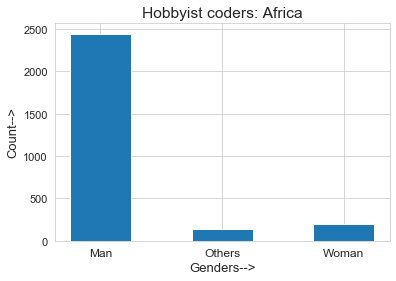

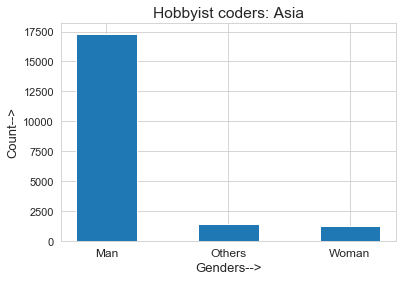

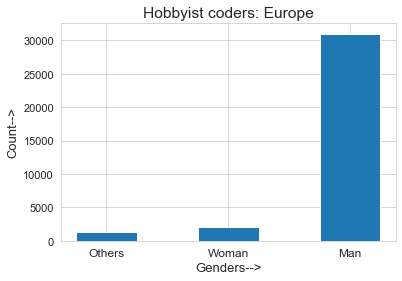

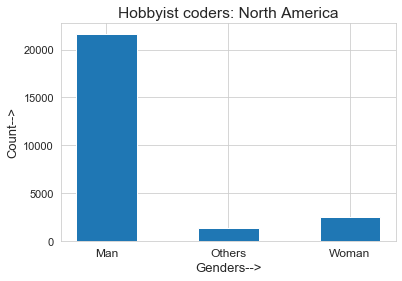

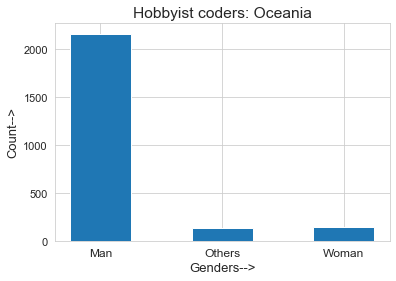

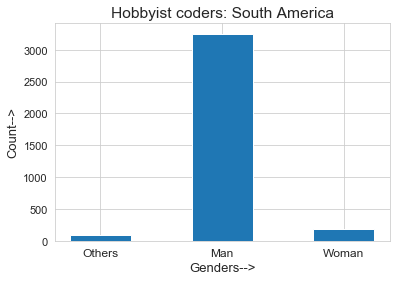

In [46]:
code_hobby_df = survey_results_df.groupby(['Continent','Gender'])[['Hobbyist']].count().reset_index().sort_values(by=['Continent'])

CONTINENTS = code_hobby_df.Continent.unique()
for continent in CONTINENTS:
    code_hobby_continent_df = code_hobby_df[code_hobby_df['Continent']==continent].reset_index().drop('index',axis=1)
    
    fig, ax = plt.subplots()
    sns.set_style("whitegrid")
    matplotlib.rcParams['font.size'] = 13
    
    ax.bar(code_hobby_continent_df.Gender,code_hobby_continent_df.Hobbyist,width=0.5)
    chart_title = 'Hobbyist coders: '+ str(continent)
    plt.title(chart_title)
    plt.xlabel('Genders-->')
    plt.ylabel('Count-->')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=11)
    plt.show()
    plt.close()

### F. Report for job and career satisfaction of developer based on their gender and continent.

Creating seperate reports data frames for 'Man', 'Woman' and 'Others' for both Job and Career satisfaction.

#### 1. Country wise Job Satisfaction for 'Man', 'Woman' and 'Others' :

In [69]:
continent_list = []

#man
slight_satis_man_list = []
slight_disat_man_list = []
neither_sat_nor_disat_man_list = []
very_satis_man_list = []
very_disatis_man_list = []

#woman
slight_satis_woman_list = []
slight_disat_woman_list = []
neither_sat_nor_disat_woman_list = []
very_satis_woman_list = []
very_disatis_woman_list = []

#others
slight_satis_others_list = []
slight_disat_others_list = []
neither_sat_nor_disat_others_list = []
very_satis_others_list = []
very_disatis_others_list = []

CONTINENTS = np.delete(survey_results_df.Continent.unique(),-1)

for continent in CONTINENTS:
    continent_list.append(continent)
    
    #man
    slight_satis_count_man = survey_results_df[(survey_results_df['JobSat']=='Slightly satisfied') & (survey_results_df['Continent']==continent) & (survey_results_df['Gender']=='Man')].shape[0]
    slight_satis_man_list.append(slight_satis_count_man)
    
    slight_disat_count_man = survey_results_df[(survey_results_df['JobSat']=='Slightly dissatisfied') & (survey_results_df['Continent']==continent) & (survey_results_df['Gender']=='Man')].shape[0]
    slight_disat_man_list.append(slight_disat_count_man)
    
    neither_sat_nor_disat_count_man = survey_results_df[(survey_results_df['JobSat']=='Neither satisfied nor dissatisfied') & (survey_results_df['Continent']==continent) & (survey_results_df['Gender']=='Man')].shape[0]
    neither_sat_nor_disat_man_list.append(neither_sat_nor_disat_count_man)
    
    very_satis_count_man = survey_results_df[(survey_results_df['JobSat']=='Very satisfied') & (survey_results_df['Continent']==continent) & (survey_results_df['Gender']=='Man')].shape[0]
    very_satis_man_list.append(very_satis_count_man)
    
    very_disatis_count_man = survey_results_df[(survey_results_df['JobSat']=='Very dissatisfied') & (survey_results_df['Continent']==continent) & (survey_results_df['Gender']=='Man')].shape[0]
    very_disatis_man_list.append(very_disatis_count_man)
    
    
    #woman
    slight_satis_count_woman = survey_results_df[(survey_results_df['JobSat']=='Slightly satisfied') & (survey_results_df['Continent']==continent) & (survey_results_df['Gender']=='Woman')].shape[0]
    slight_satis_woman_list.append(slight_satis_count_woman)
    
    slight_disat_count_woman = survey_results_df[(survey_results_df['JobSat']=='Slightly dissatisfied') & (survey_results_df['Continent']==continent) & (survey_results_df['Gender']=='Woman')].shape[0]
    slight_disat_woman_list.append(slight_disat_count_woman)
    
    neither_sat_nor_disat_count_woman = survey_results_df[(survey_results_df['JobSat']=='Neither satisfied nor dissatisfied') & (survey_results_df['Continent']==continent) & (survey_results_df['Gender']=='Woman')].shape[0]
    neither_sat_nor_disat_woman_list.append(neither_sat_nor_disat_count_woman)
    
    very_satis_count_woman = survey_results_df[(survey_results_df['JobSat']=='Very satisfied') & (survey_results_df['Continent']==continent) & (survey_results_df['Gender']=='Woman')].shape[0]
    very_satis_woman_list.append(very_satis_count_woman)
    
    very_disatis_count_woman = survey_results_df[(survey_results_df['JobSat']=='Very dissatisfied') & (survey_results_df['Continent']==continent) & (survey_results_df['Gender']=='Woman')].shape[0]
    very_disatis_woman_list.append(very_disatis_count_woman)
    
    
    #others
    slight_satis_count_others = survey_results_df[(survey_results_df['JobSat']=='Slightly satisfied') & (survey_results_df['Continent']==continent) & (survey_results_df['Gender']=='Others')].shape[0]
    slight_satis_others_list.append(slight_satis_count_others)
    
    slight_disat_count_others = survey_results_df[(survey_results_df['JobSat']=='Slightly dissatisfied') & (survey_results_df['Continent']==continent) & (survey_results_df['Gender']=='Others')].shape[0]
    slight_disat_others_list.append(slight_disat_count_others)
    
    neither_sat_nor_disat_count_others = survey_results_df[(survey_results_df['JobSat']=='Neither satisfied nor dissatisfied') & (survey_results_df['Continent']==continent) & (survey_results_df['Gender']=='Others')].shape[0]
    neither_sat_nor_disat_others_list.append(neither_sat_nor_disat_count_others)
    
    very_satis_count_others = survey_results_df[(survey_results_df['JobSat']=='Very satisfied') & (survey_results_df['Continent']==continent) & (survey_results_df['Gender']=='Others')].shape[0]
    very_satis_others_list.append(very_satis_count_others)
    
    very_disatis_count_others = survey_results_df[(survey_results_df['JobSat']=='Very dissatisfied') & (survey_results_df['Continent']==continent) & (survey_results_df['Gender']=='Others')].shape[0]
    very_disatis_others_list.append(very_disatis_count_others)

    

job_sat_man_dict = {'Continent':continent_list,'Very_dissatisfied':very_disatis_man_list,'Slightly_dissatisfied':slight_disat_man_list,
               'Neither_satisfied_nor_dissatisfied':neither_sat_nor_disat_man_list,'Slightly_satisfied':slight_satis_man_list,
                'Very_satisfied':very_satis_man_list}

job_sat_woman_dict = {'Continent':continent_list,'Very_dissatisfied':very_disatis_woman_list,'Slightly_dissatisfied':slight_disat_woman_list,
               'Neither_satisfied_nor_dissatisfied':neither_sat_nor_disat_woman_list,'Slightly_satisfied':slight_satis_woman_list,
                'Very_satisfied':very_satis_woman_list}

job_sat_others_dict = {'Continent':continent_list,'Very_dissatisfied':very_disatis_others_list,'Slightly_dissatisfied':slight_disat_others_list,
               'Neither_satisfied_nor_dissatisfied':neither_sat_nor_disat_others_list,'Slightly_satisfied':slight_satis_others_list,
                'Very_satisfied':very_satis_others_list}

job_sat_man_df = pd.DataFrame(job_sat_man_dict).sort_values(by=['Continent']).reset_index().drop('index',axis=1)
job_sat_woman_df = pd.DataFrame(job_sat_woman_dict).sort_values(by=['Continent']).reset_index().drop('index',axis=1)
job_sat_others_df = pd.DataFrame(job_sat_others_dict).sort_values(by=['Continent']).reset_index().drop('index',axis=1)

###### Job satisfaction report for' Man':

In [70]:
job_sat_man_df

,Continent,Very_dissatisfied,Slightly_dissatisfied,Neither_satisfied_nor_dissatisfied,Slightly_satisfied,Very_satisfied
0,Africa,139,266,245,544,353
1,Asia,1014,2436,2303,4588,2814
2,Europe,1658,3789,2947,9124,8045
3,North America,1083,2335,1691,5900,7214
4,Oceania,118,242,192,631,641
5,South America,237,526,372,908,675


###### Job satisfaction report for 'Woman':

In [71]:
job_sat_woman_df

,Continent,Very_dissatisfied,Slightly_dissatisfied,Neither_satisfied_nor_dissatisfied,Slightly_satisfied,Very_satisfied
0,Africa,21,19,16,30,29
1,Asia,75,141,150,287,204
2,Europe,103,259,167,546,560
3,North America,111,252,130,584,890
4,Oceania,8,13,9,46,43
5,South America,11,21,20,51,43


###### Job satisfaction report for 'Others':

In [72]:
job_sat_others_df

,Continent,Very_dissatisfied,Slightly_dissatisfied,Neither_satisfied_nor_dissatisfied,Slightly_satisfied,Very_satisfied
0,Africa,10,15,6,15,16
1,Asia,93,113,186,257,191
2,Europe,68,127,132,300,326
3,North America,86,157,118,319,350
4,Oceania,5,14,14,25,26
5,South America,6,11,13,22,9


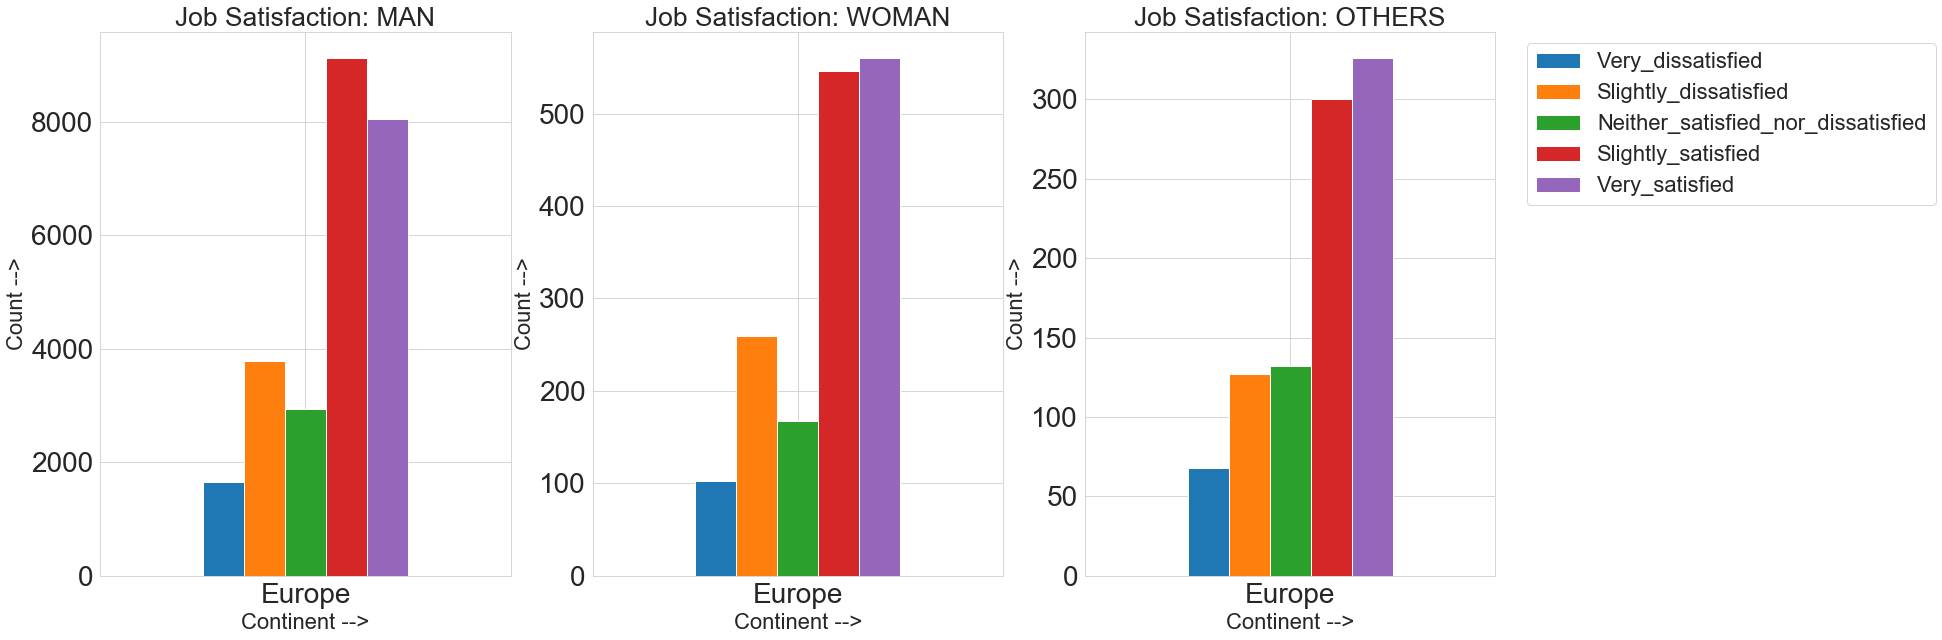

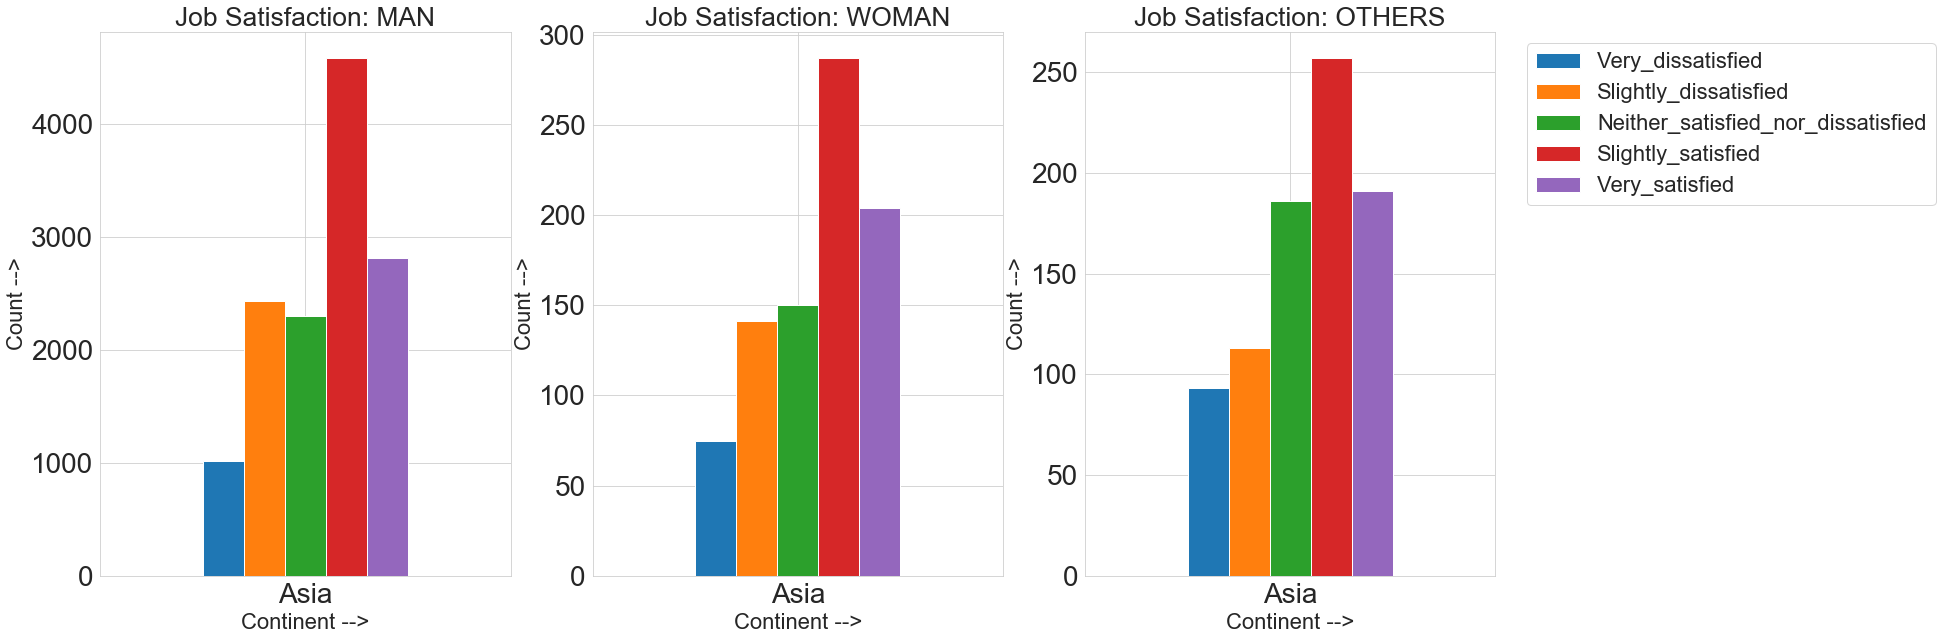

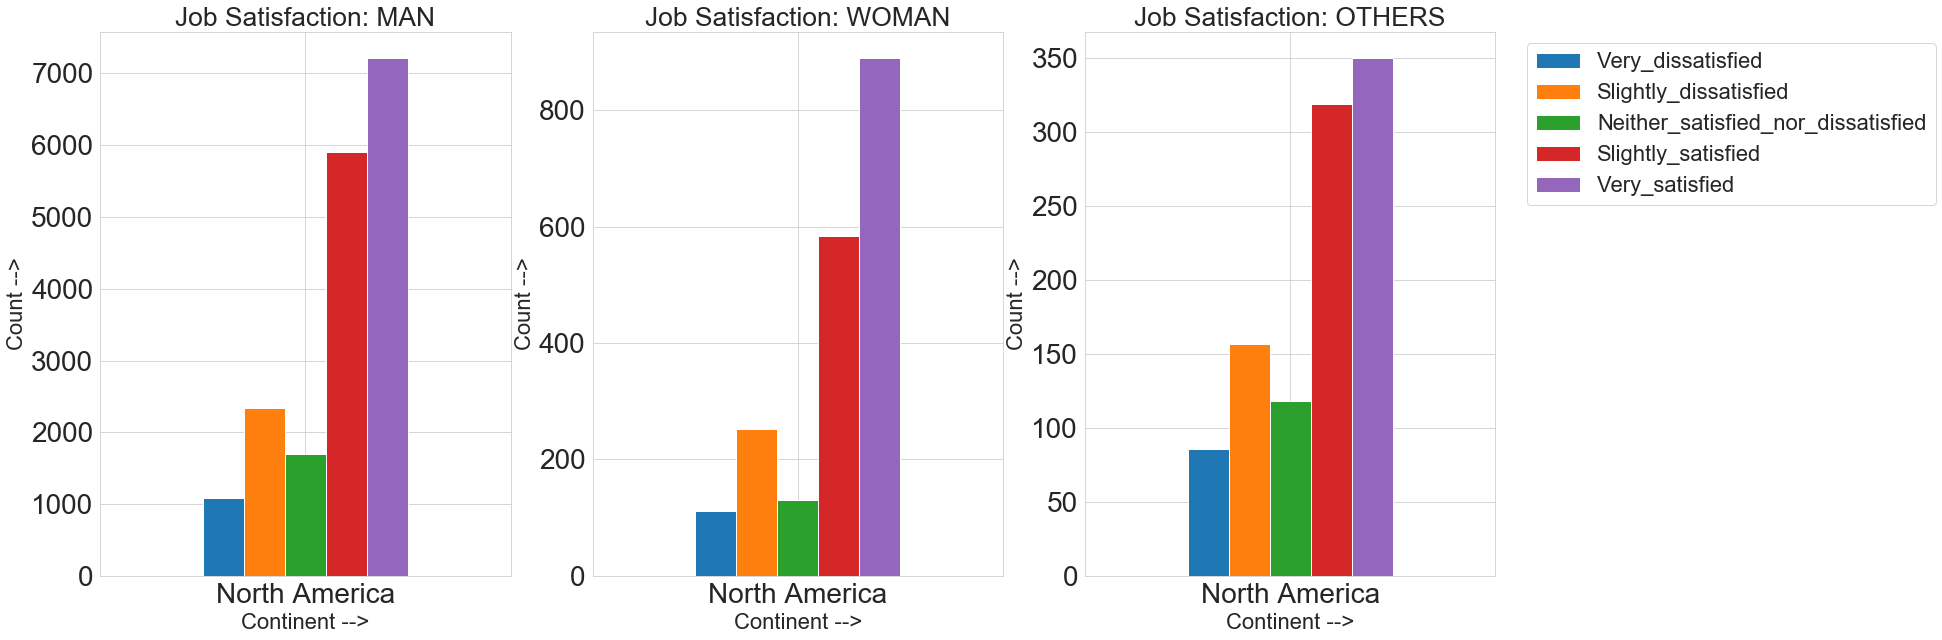

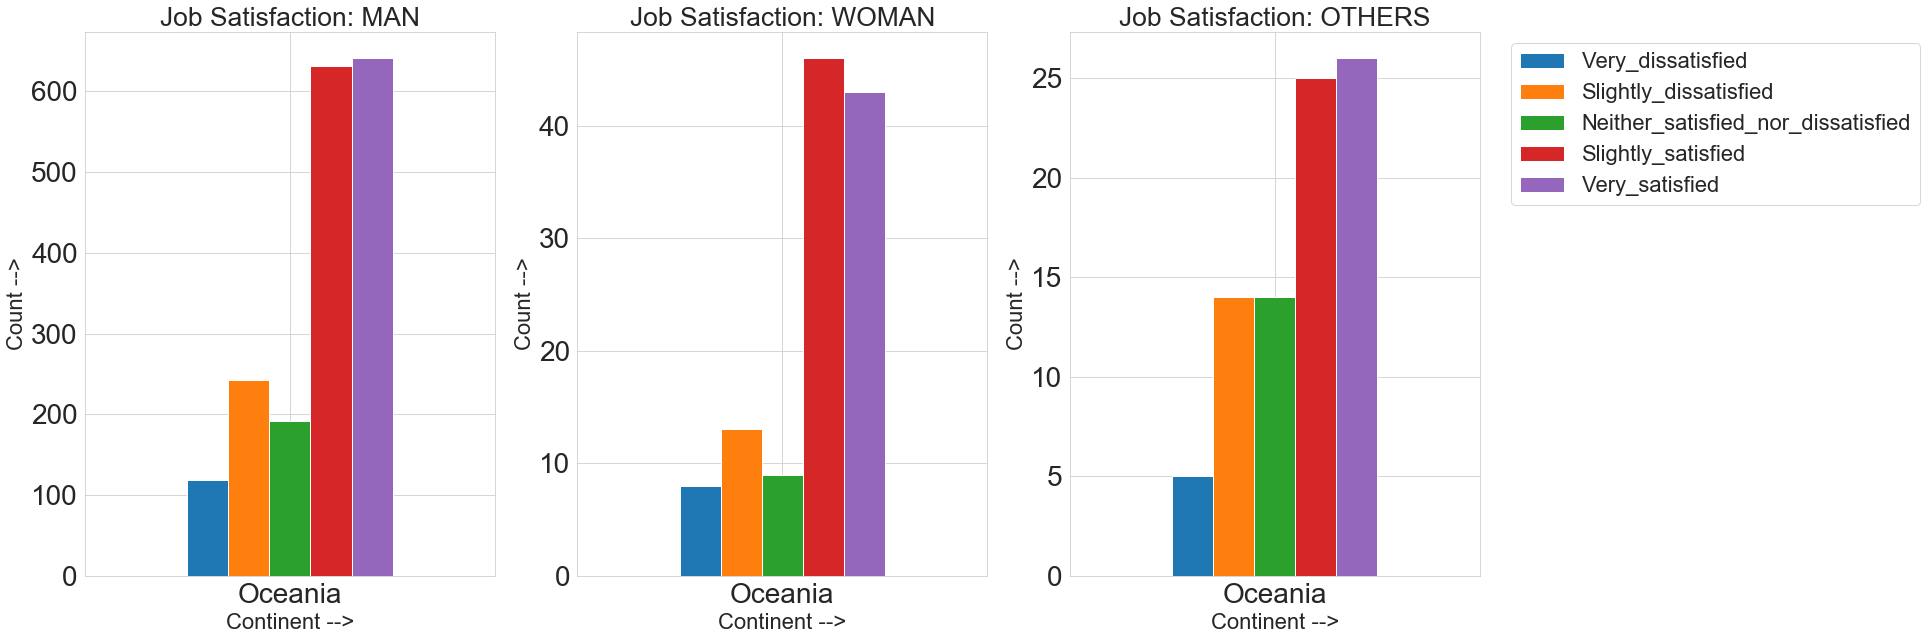

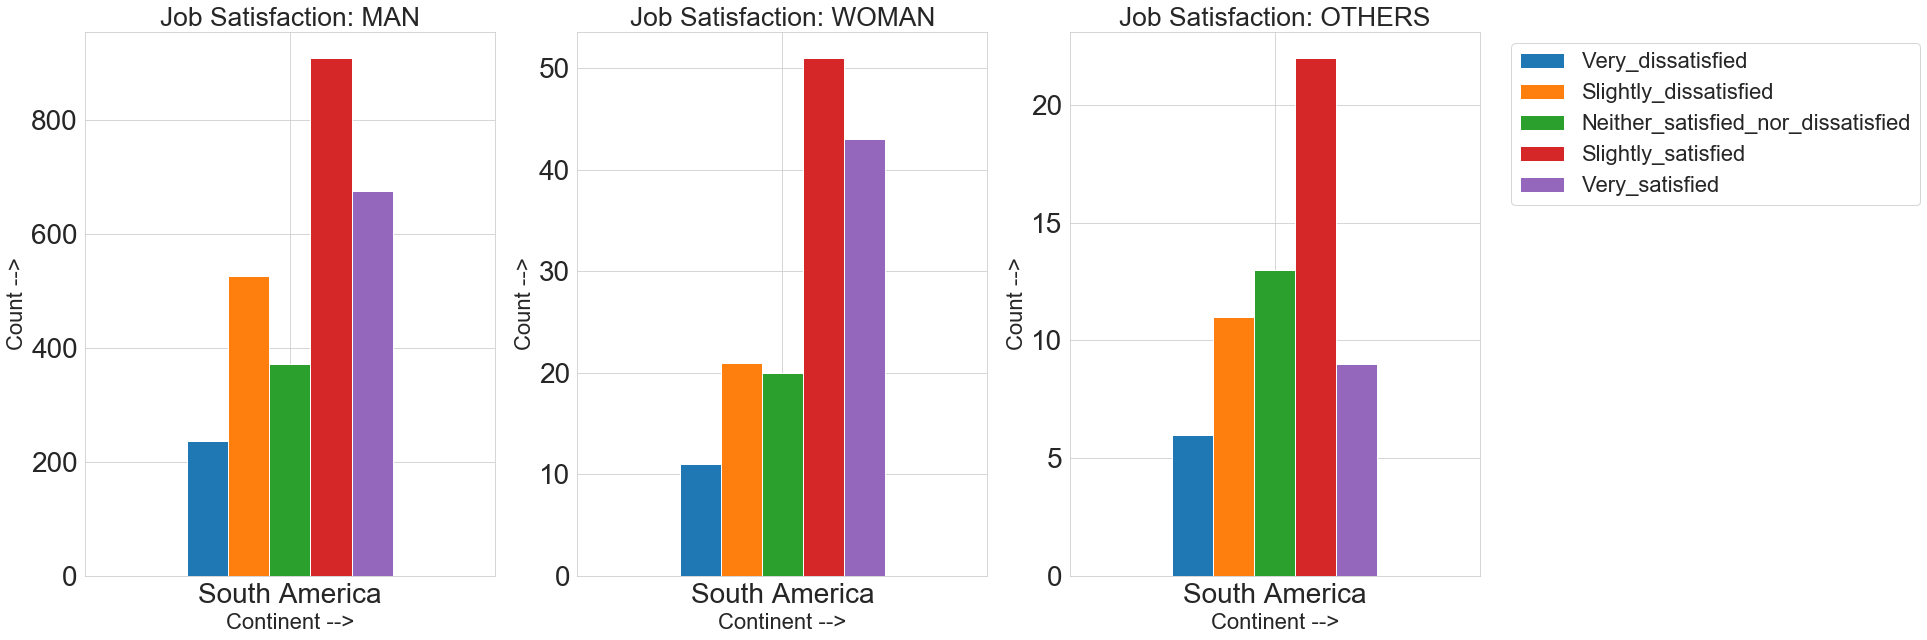

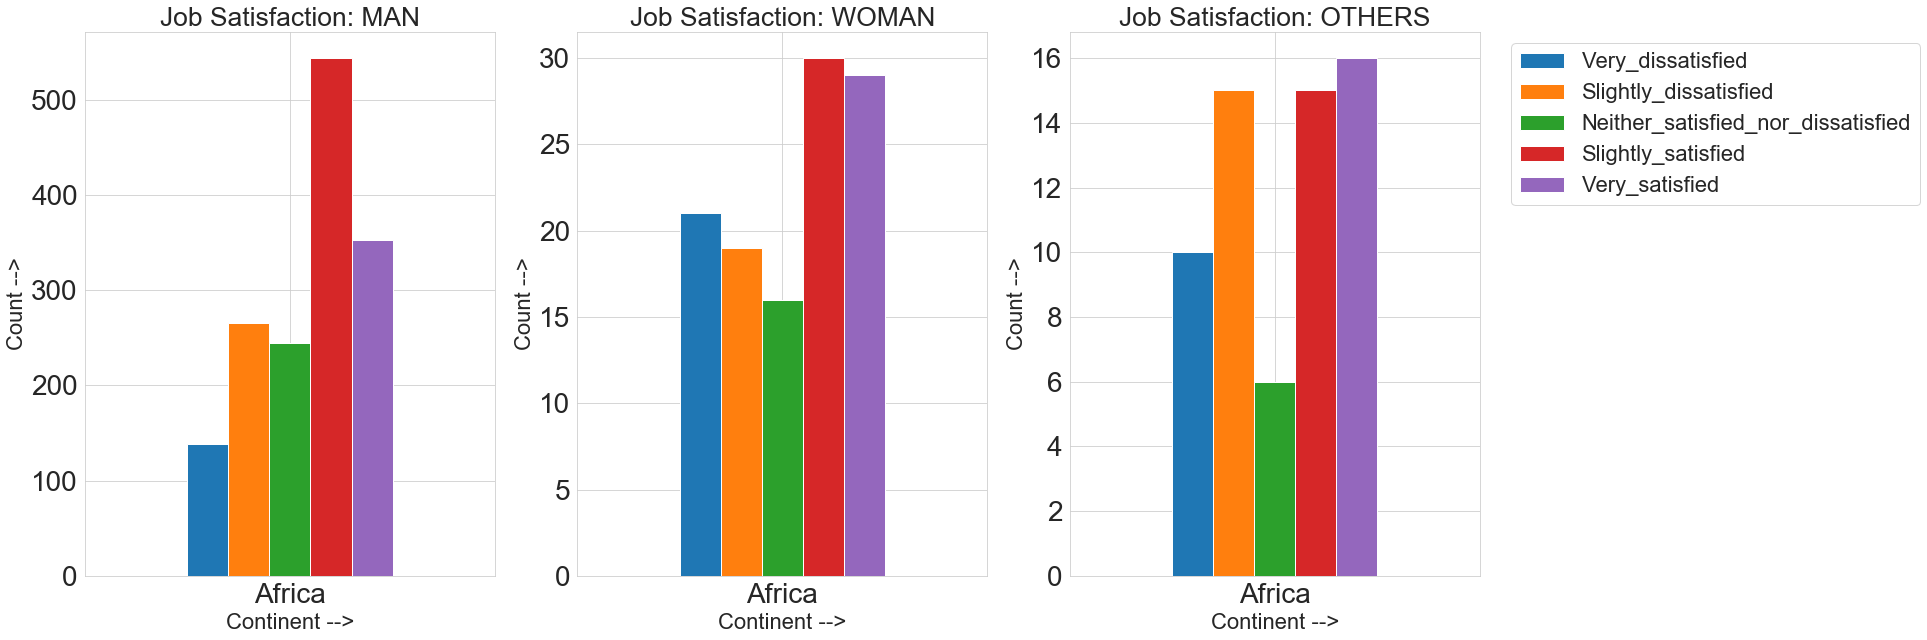

In [88]:
for continent in CONTINENTS:
    fig, axes = plt.subplots(1,3 , figsize=(25,10))
    
    job_sat_man_df[job_sat_man_df['Continent']==continent].plot(x="Continent", y=["Very_dissatisfied","Slightly_dissatisfied", "Neither_satisfied_nor_dissatisfied","Slightly_satisfied","Very_satisfied"], kind="bar",legend= False ,ax=axes[0]) 
    sns.set_style("whitegrid")
    matplotlib.rcParams['font.size'] = 22
    axes[0].set_xlabel('Continent -->')
    axes[0].set_ylabel('Count -->')
    axes[0].tick_params(labelrotation=0, labelsize = 28)
    axes[0].set_title('Job Satisfaction: MAN')
    
    
    job_sat_woman_df[job_sat_woman_df['Continent']==continent].plot(x="Continent", y=["Very_dissatisfied","Slightly_dissatisfied", "Neither_satisfied_nor_dissatisfied","Slightly_satisfied","Very_satisfied"], kind="bar", legend=False ,ax=axes[1]) 
    sns.set_style("whitegrid")
    matplotlib.rcParams['font.size'] = 22
    axes[1].set_xlabel('Continent -->')
    axes[1].set_ylabel('Count -->')
    axes[1].tick_params(labelrotation=0, labelsize = 28)
    axes[1].set_title('Job Satisfaction: WOMAN')
    
    
    job_sat_others_df[job_sat_others_df['Continent']==continent].plot(x="Continent", y=["Very_dissatisfied","Slightly_dissatisfied", "Neither_satisfied_nor_dissatisfied","Slightly_satisfied","Very_satisfied"], kind="bar", ax=axes[2]) 
    sns.set_style("whitegrid")
    matplotlib.rcParams['font.size'] = 22
    axes[2].legend(bbox_to_anchor=(1.05, 1),loc='upper left')
    axes[2].set_xlabel('Continent -->')
    axes[2].set_ylabel('Count -->')
    axes[2].tick_params(labelrotation=0, labelsize = 28)
    axes[2].set_title('Job Satisfaction: OTHERS')
    
    plt.show()
    plt.close()

#### 2. Country wise Career Satisfaction for 'Man', 'Woman' and 'Others' :

In [81]:
continent_list = []

#man
slight_satis_man_list = []
slight_disat_man_list = []
neither_sat_nor_disat_man_list = []
very_satis_man_list = []
very_disatis_man_list = []

#woman
slight_satis_woman_list = []
slight_disat_woman_list = []
neither_sat_nor_disat_woman_list = []
very_satis_woman_list = []
very_disatis_woman_list = []

#others
slight_satis_others_list = []
slight_disat_others_list = []
neither_sat_nor_disat_others_list = []
very_satis_others_list = []
very_disatis_others_list = []

CONTINENTS = np.delete(survey_results_df.Continent.unique(),-1)

for continent in CONTINENTS:
    continent_list.append(continent)
    
    #man
    slight_satis_count_man = survey_results_df[(survey_results_df['CareerSat']=='Slightly satisfied') & (survey_results_df['Continent']==continent) & (survey_results_df['Gender']=='Man')].shape[0]
    slight_satis_man_list.append(slight_satis_count_man)
    
    slight_disat_count_man = survey_results_df[(survey_results_df['CareerSat']=='Slightly dissatisfied') & (survey_results_df['Continent']==continent) & (survey_results_df['Gender']=='Man')].shape[0]
    slight_disat_man_list.append(slight_disat_count_man)
    
    neither_sat_nor_disat_count_man = survey_results_df[(survey_results_df['CareerSat']=='Neither satisfied nor dissatisfied') & (survey_results_df['Continent']==continent) & (survey_results_df['Gender']=='Man')].shape[0]
    neither_sat_nor_disat_man_list.append(neither_sat_nor_disat_count_man)
    
    very_satis_count_man = survey_results_df[(survey_results_df['CareerSat']=='Very satisfied') & (survey_results_df['Continent']==continent) & (survey_results_df['Gender']=='Man')].shape[0]
    very_satis_man_list.append(very_satis_count_man)
    
    very_disatis_count_man = survey_results_df[(survey_results_df['CareerSat']=='Very dissatisfied') & (survey_results_df['Continent']==continent) & (survey_results_df['Gender']=='Man')].shape[0]
    very_disatis_man_list.append(very_disatis_count_man)
    
    
    #woman
    slight_satis_count_woman = survey_results_df[(survey_results_df['CareerSat']=='Slightly satisfied') & (survey_results_df['Continent']==continent) & (survey_results_df['Gender']=='Woman')].shape[0]
    slight_satis_woman_list.append(slight_satis_count_woman)
    
    slight_disat_count_woman = survey_results_df[(survey_results_df['CareerSat']=='Slightly dissatisfied') & (survey_results_df['Continent']==continent) & (survey_results_df['Gender']=='Woman')].shape[0]
    slight_disat_woman_list.append(slight_disat_count_woman)
    
    neither_sat_nor_disat_count_woman = survey_results_df[(survey_results_df['CareerSat']=='Neither satisfied nor dissatisfied') & (survey_results_df['Continent']==continent) & (survey_results_df['Gender']=='Woman')].shape[0]
    neither_sat_nor_disat_woman_list.append(neither_sat_nor_disat_count_woman)
    
    very_satis_count_woman = survey_results_df[(survey_results_df['CareerSat']=='Very satisfied') & (survey_results_df['Continent']==continent) & (survey_results_df['Gender']=='Woman')].shape[0]
    very_satis_woman_list.append(very_satis_count_woman)
    
    very_disatis_count_woman = survey_results_df[(survey_results_df['CareerSat']=='Very dissatisfied') & (survey_results_df['Continent']==continent) & (survey_results_df['Gender']=='Woman')].shape[0]
    very_disatis_woman_list.append(very_disatis_count_woman)
    
    
    #others
    slight_satis_count_others = survey_results_df[(survey_results_df['CareerSat']=='Slightly satisfied') & (survey_results_df['Continent']==continent) & (survey_results_df['Gender']=='Others')].shape[0]
    slight_satis_others_list.append(slight_satis_count_others)
    
    slight_disat_count_others = survey_results_df[(survey_results_df['CareerSat']=='Slightly dissatisfied') & (survey_results_df['Continent']==continent) & (survey_results_df['Gender']=='Others')].shape[0]
    slight_disat_others_list.append(slight_disat_count_others)
    
    neither_sat_nor_disat_count_others = survey_results_df[(survey_results_df['CareerSat']=='Neither satisfied nor dissatisfied') & (survey_results_df['Continent']==continent) & (survey_results_df['Gender']=='Others')].shape[0]
    neither_sat_nor_disat_others_list.append(neither_sat_nor_disat_count_others)
    
    very_satis_count_others = survey_results_df[(survey_results_df['CareerSat']=='Very satisfied') & (survey_results_df['Continent']==continent) & (survey_results_df['Gender']=='Others')].shape[0]
    very_satis_others_list.append(very_satis_count_others)
    
    very_disatis_count_others = survey_results_df[(survey_results_df['CareerSat']=='Very dissatisfied') & (survey_results_df['Continent']==continent) & (survey_results_df['Gender']=='Others')].shape[0]
    very_disatis_others_list.append(very_disatis_count_others)

    


career_sat_man_dict = {'Continent':continent_list,'Very_dissatisfied':very_disatis_man_list,'Slightly_dissatisfied':slight_disat_man_list,
               'Neither_satisfied_nor_dissatisfied':neither_sat_nor_disat_man_list,'Slightly_satisfied':slight_satis_man_list,
                'Very_satisfied':very_satis_man_list}

career_sat_woman_dict = {'Continent':continent_list,'Very_dissatisfied':very_disatis_woman_list,'Slightly_dissatisfied':slight_disat_woman_list,
               'Neither_satisfied_nor_dissatisfied':neither_sat_nor_disat_woman_list,'Slightly_satisfied':slight_satis_woman_list,
                'Very_satisfied':very_satis_woman_list}

career_sat_others_dict = {'Continent':continent_list,'Very_dissatisfied':very_disatis_others_list,'Slightly_dissatisfied':slight_disat_others_list,
               'Neither_satisfied_nor_dissatisfied':neither_sat_nor_disat_others_list,'Slightly_satisfied':slight_satis_others_list,
                'Very_satisfied':very_satis_others_list}

career_sat_man_df = pd.DataFrame(career_sat_man_dict).sort_values(by=['Continent']).reset_index().drop('index',axis=1)
career_sat_woman_df= pd.DataFrame(career_sat_woman_dict).sort_values(by=['Continent']).reset_index().drop('index',axis=1)
career_sat_others_df= pd.DataFrame(career_sat_others_dict).sort_values(by=['Continent']).reset_index().drop('index',axis=1)

###### Career satisfaction report for 'Man' :

In [82]:
career_sat_man_df

,Continent,Very_dissatisfied,Slightly_dissatisfied,Neither_satisfied_nor_dissatisfied,Slightly_satisfied,Very_satisfied
0,Africa,126,190,213,574,587
1,Asia,864,1883,2010,4695,4107
2,Europe,1192,2704,2477,9675,9900
3,North America,758,1444,1156,5683,9560
4,Oceania,69,184,152,655,797
5,South America,263,345,273,958,960


###### Career satisfaction report for 'Woman' :

In [83]:
career_sat_woman_df

,Continent,Very_dissatisfied,Slightly_dissatisfied,Neither_satisfied_nor_dissatisfied,Slightly_satisfied,Very_satisfied
0,Africa,15,19,4,41,41
1,Asia,54,132,142,303,264
2,Europe,86,171,155,597,660
3,North America,58,186,130,636,1018
4,Oceania,4,7,13,51,46
5,South America,7,25,13,56,53


###### Career satisfaction report for 'Others' :

In [84]:
career_sat_others_df

,Continent,Very_dissatisfied,Slightly_dissatisfied,Neither_satisfied_nor_dissatisfied,Slightly_satisfied,Very_satisfied
0,Africa,13,15,8,20,19
1,Asia,95,107,187,297,284
2,Europe,47,108,152,362,335
3,North America,63,122,123,336,459
4,Oceania,7,9,15,30,33
5,South America,6,7,14,21,17


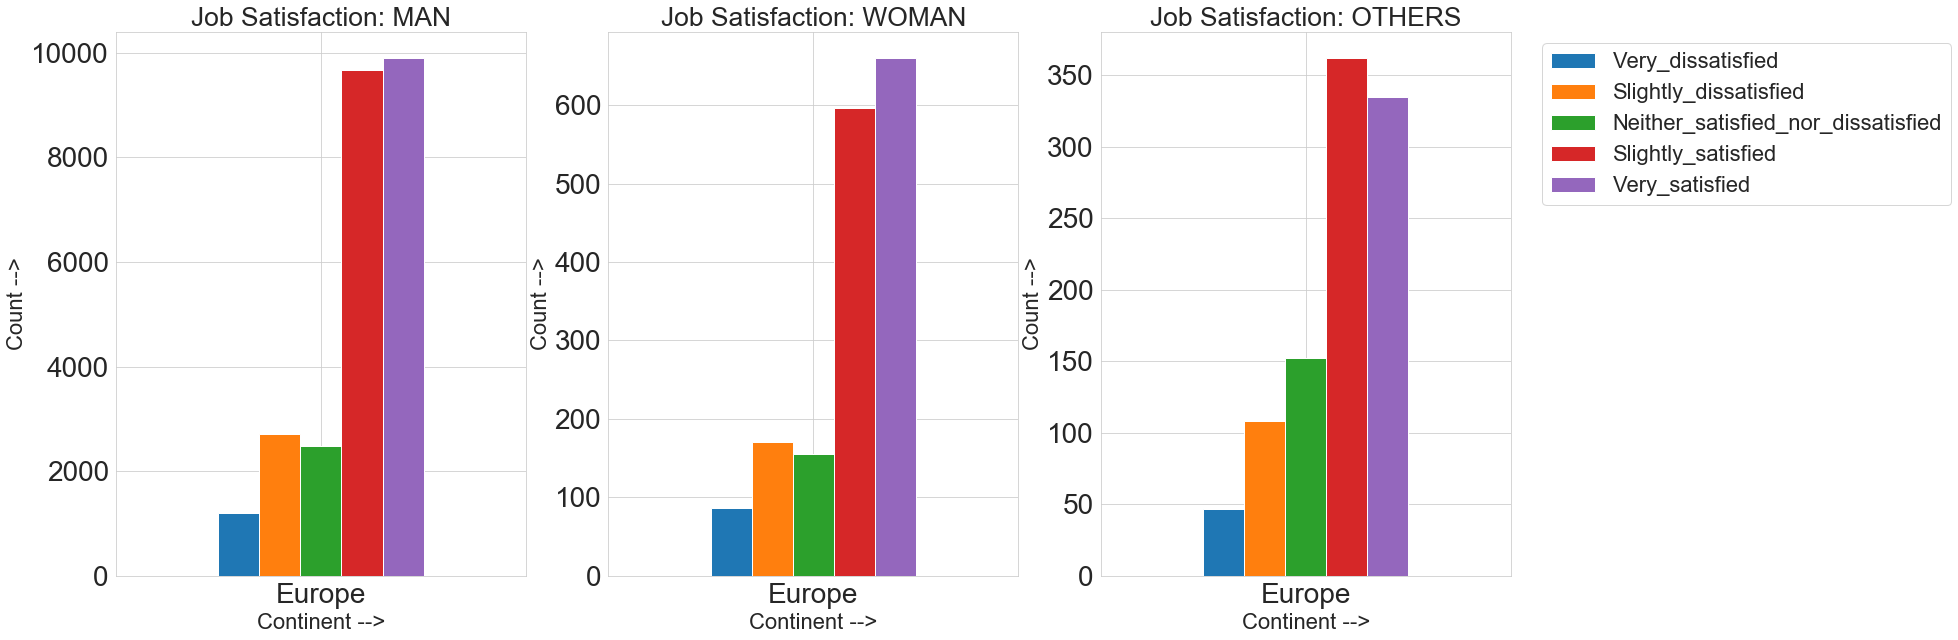

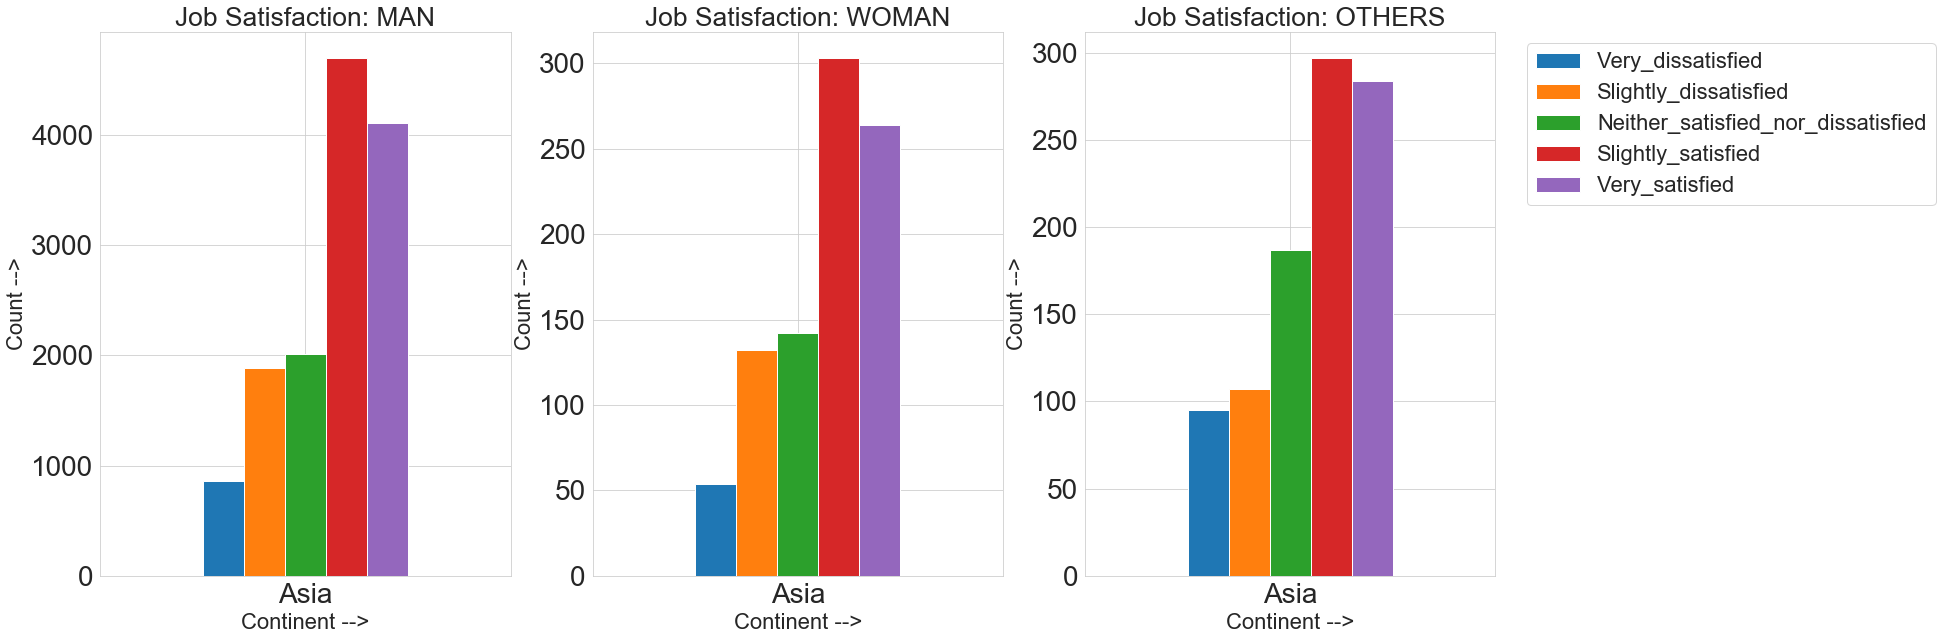

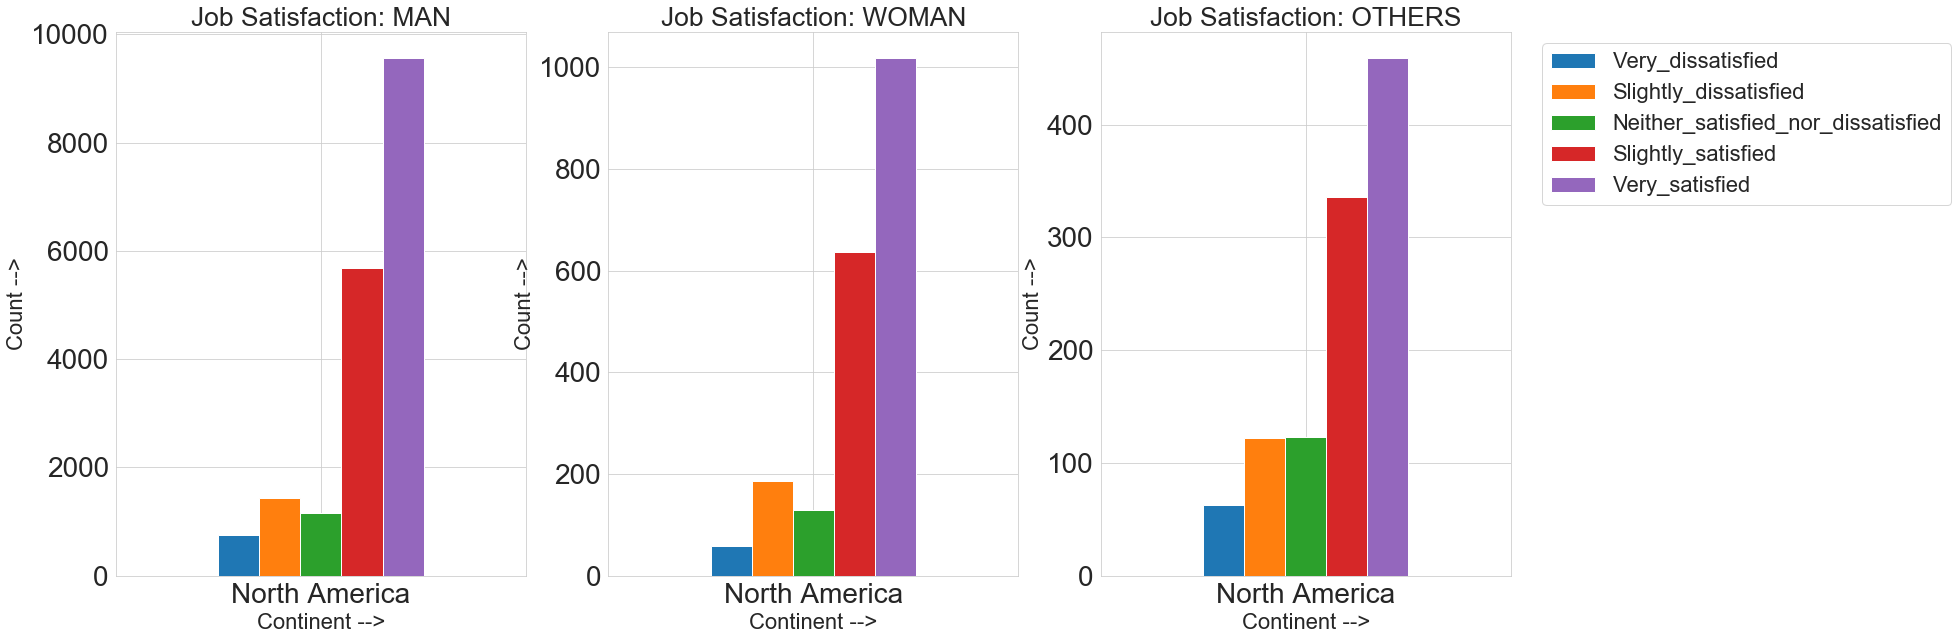

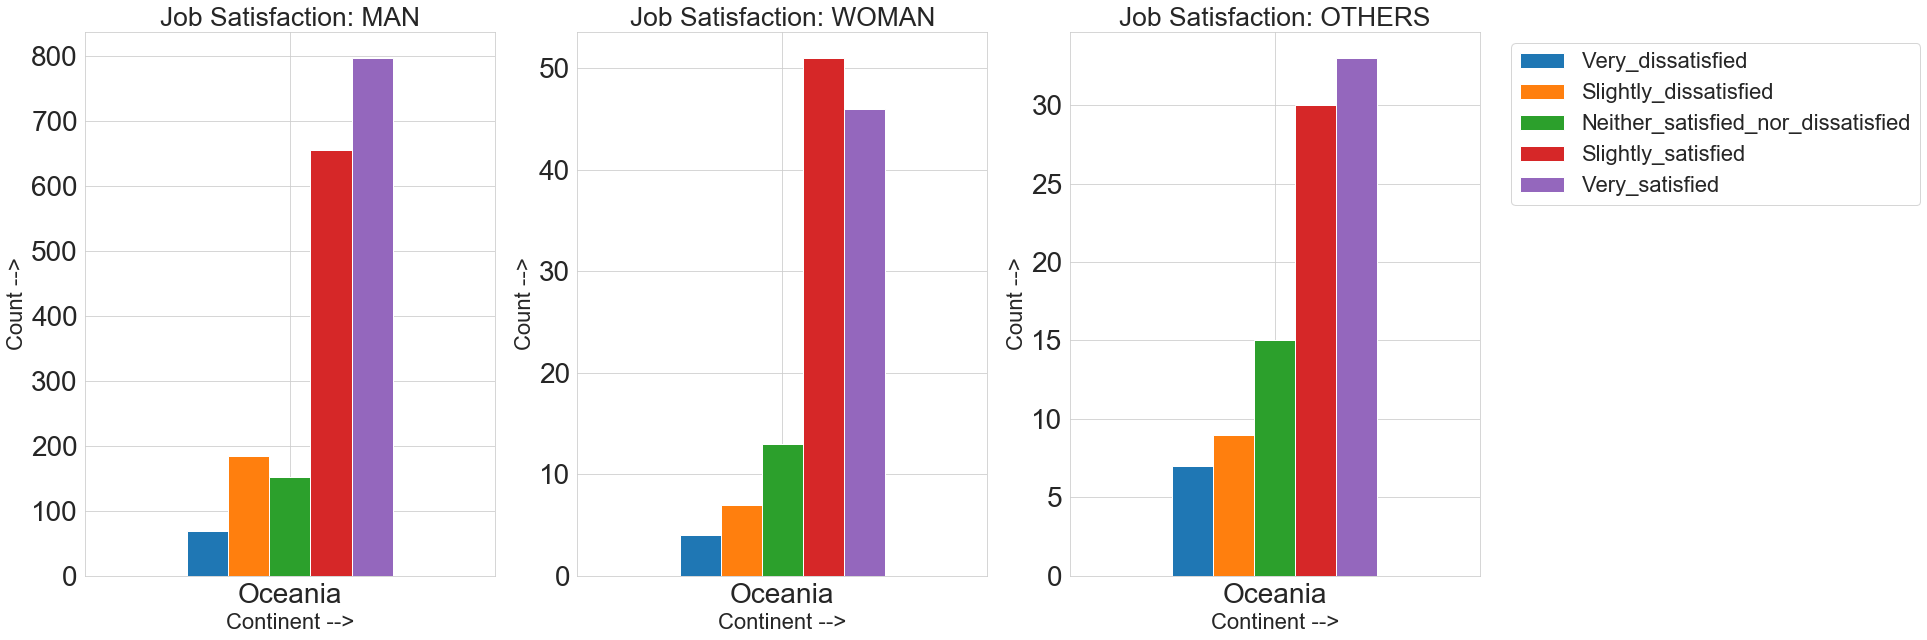

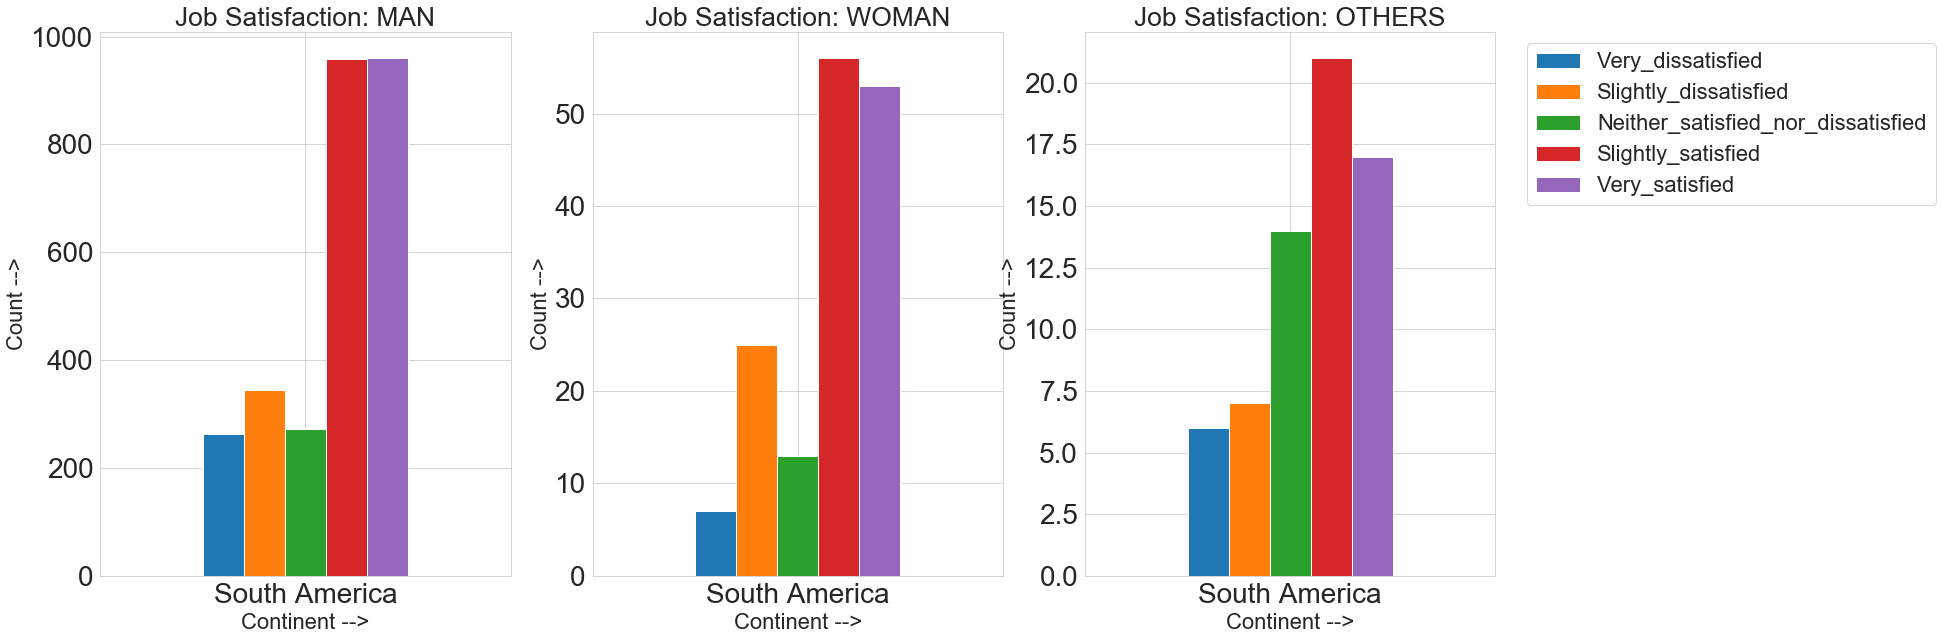

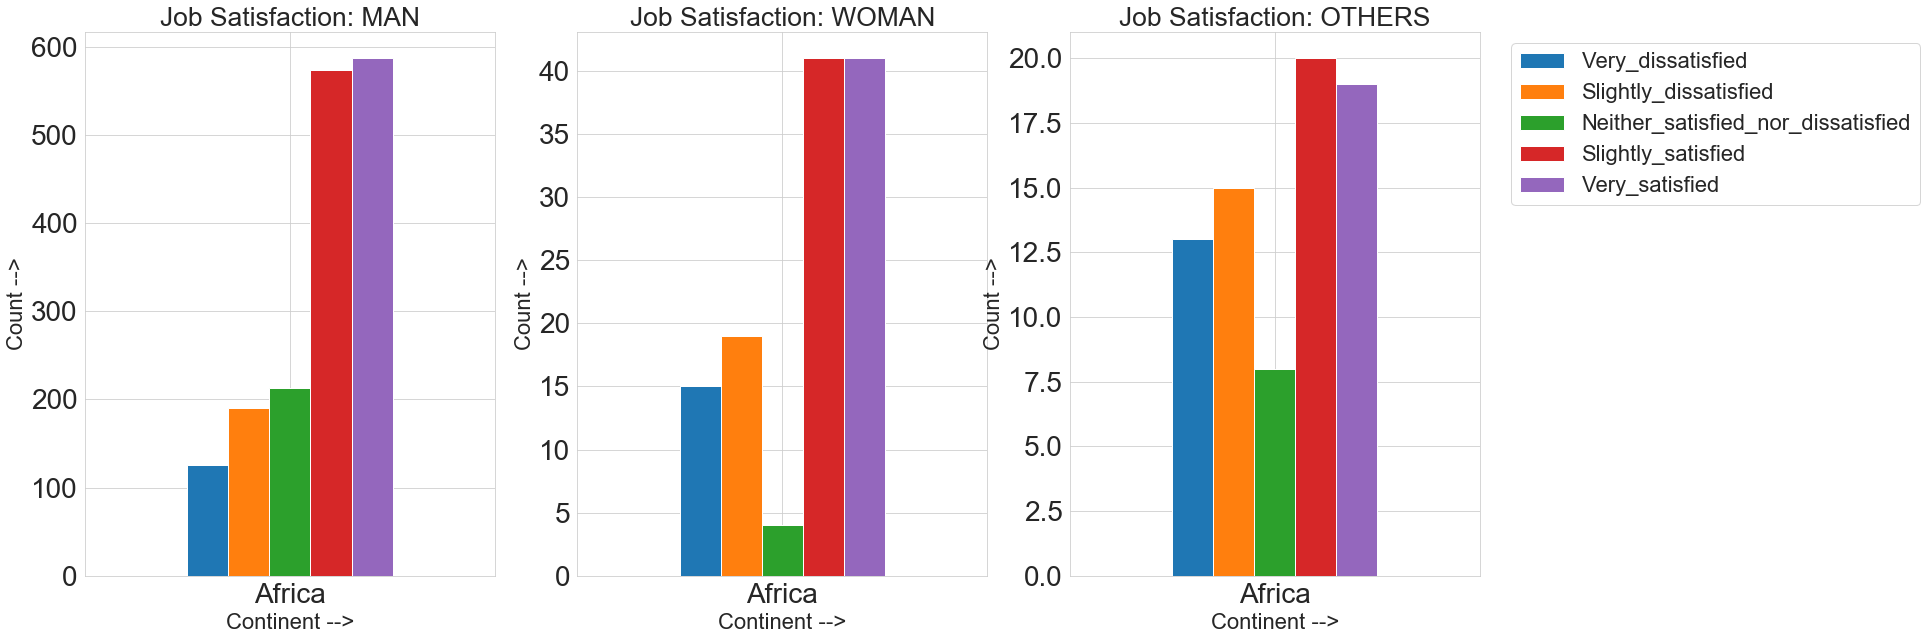

In [89]:
for continent in CONTINENTS:
    fig, axes = plt.subplots(1,3 , figsize=(25,10))
    
    career_sat_man_df[career_sat_man_df['Continent']==continent].plot(x="Continent", y=["Very_dissatisfied","Slightly_dissatisfied", "Neither_satisfied_nor_dissatisfied","Slightly_satisfied","Very_satisfied"], kind="bar",legend= False ,ax=axes[0]) 
    sns.set_style("whitegrid")
    matplotlib.rcParams['font.size'] = 22
    axes[0].set_xlabel('Continent -->')
    axes[0].set_ylabel('Count -->')
    axes[0].tick_params(labelrotation=0, labelsize = 28)
    axes[0].set_title('Job Satisfaction: MAN')
    
    
    career_sat_woman_df[career_sat_woman_df['Continent']==continent].plot(x="Continent", y=["Very_dissatisfied","Slightly_dissatisfied", "Neither_satisfied_nor_dissatisfied","Slightly_satisfied","Very_satisfied"], kind="bar", legend=False ,ax=axes[1]) 
    sns.set_style("whitegrid")
    matplotlib.rcParams['font.size'] = 22
    axes[1].set_xlabel('Continent -->')
    axes[1].set_ylabel('Count -->')
    axes[1].tick_params(labelrotation=0, labelsize = 28)
    axes[1].set_title('Job Satisfaction: WOMAN')
    
    
    career_sat_others_df[career_sat_others_df['Continent']==continent].plot(x="Continent", y=["Very_dissatisfied","Slightly_dissatisfied", "Neither_satisfied_nor_dissatisfied","Slightly_satisfied","Very_satisfied"], kind="bar", ax=axes[2]) 
    sns.set_style("whitegrid")
    matplotlib.rcParams['font.size'] = 22
    axes[2].legend(bbox_to_anchor=(1.05, 1),loc='upper left')
    axes[2].set_xlabel('Continent -->')
    axes[2].set_ylabel('Count -->')
    axes[2].tick_params(labelrotation=0, labelsize = 28)
    axes[2].set_title('Job Satisfaction: OTHERS')
    
    plt.show()
    plt.close()